 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
df_whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
# YOUR CODE HERE

In [3]:
# Count nulls
df_whale_returns.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
df_whale_returns.dropna(inplace=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
df_algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
# YOUR CODE HERE

In [6]:
# Count nulls
df_algo_returns.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
df_algo_returns.dropna(inplace=True)
# YOUR CODE HERE

In [8]:
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
df_sp500_history  = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
df_sp500_history.head()
# YOUR CODE HERE


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
df_sp500_history.dtypes
# YOUR CODE HERE

Close    object
dtype: object

In [11]:
# Fix Data Types
df_sp500_history["Close"] = df_sp500_history["Close"].str.replace('$','')
df_sp500_history["Close"] = df_sp500_history["Close"].astype(float)


# YOUR CODE HERE

In [12]:
# Check Data Types
df_sp500_history.dtypes
df_sp500_history.head()
# YOUR CODE HERE

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns
df_sp500_returns = df_sp500_history.pct_change()
df_sp500_returns.head()
# YOUR CODE HERE

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
df_sp500_returns.dropna(inplace=True)
df_sp500_returns.head()
# YOUR CODE HERE

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Rename Column
# YOUR CODE HERE
df_sp500_returns = df_sp500_returns.rename(columns={'Close':'S&P500 Index'})
df_sp500_returns.head()
# not applicable

,S&P500 Index
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([df_whale_returns,df_algo_returns,df_sp500_returns], axis="columns", join="inner")
combined_data.sort_index()
combined_data.head()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Index
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

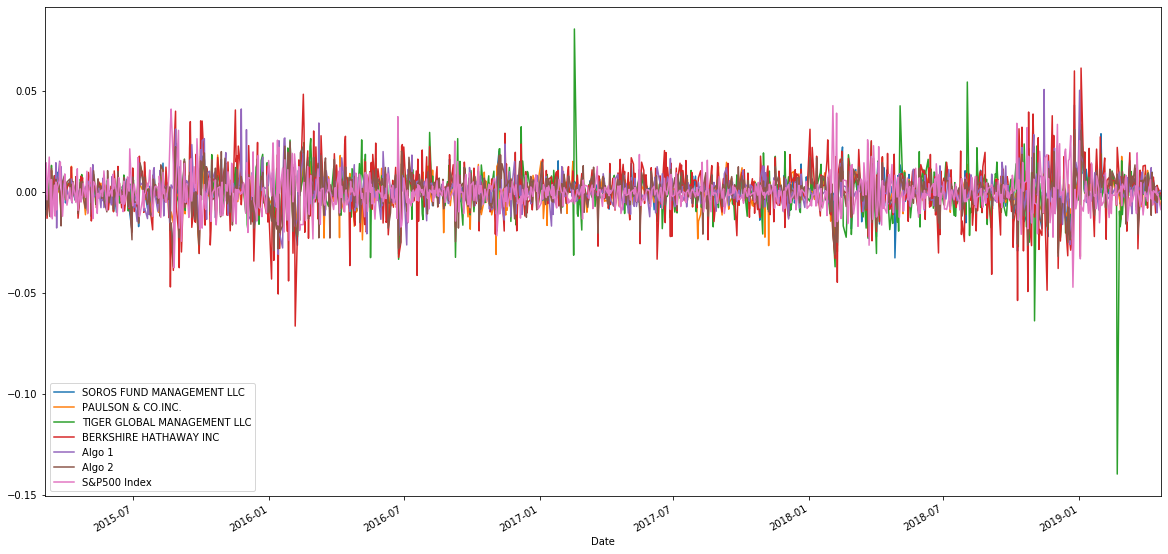

In [17]:
# Plot daily returns
# YOUR CODE HERE
combined_data.plot(figsize=(20,10))

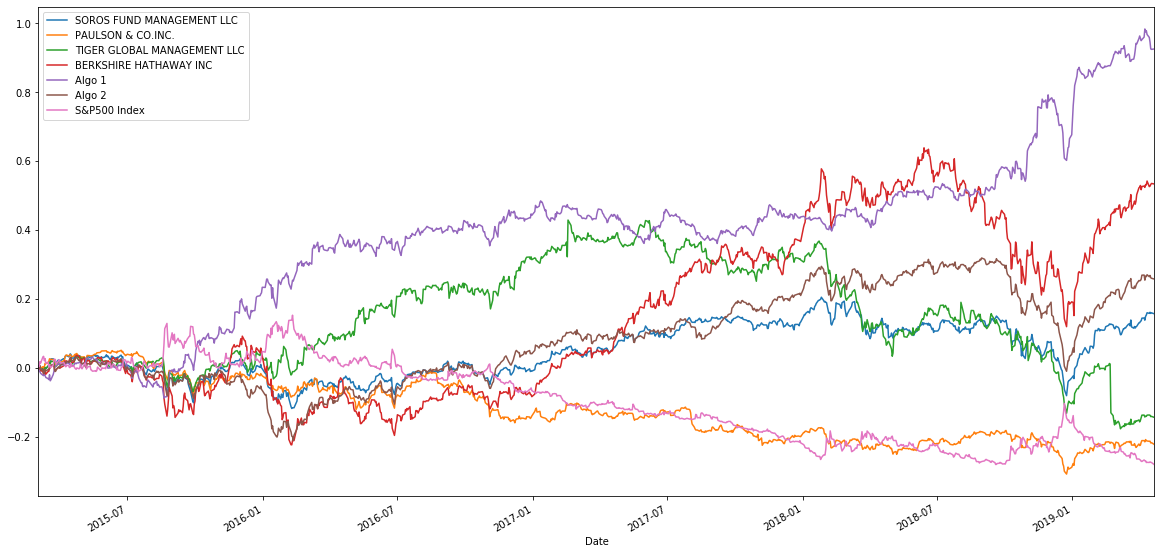

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_combined_df = (1 + combined_data).cumprod() -1
cumulative_combined_df.head()
cumulative_combined_df.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

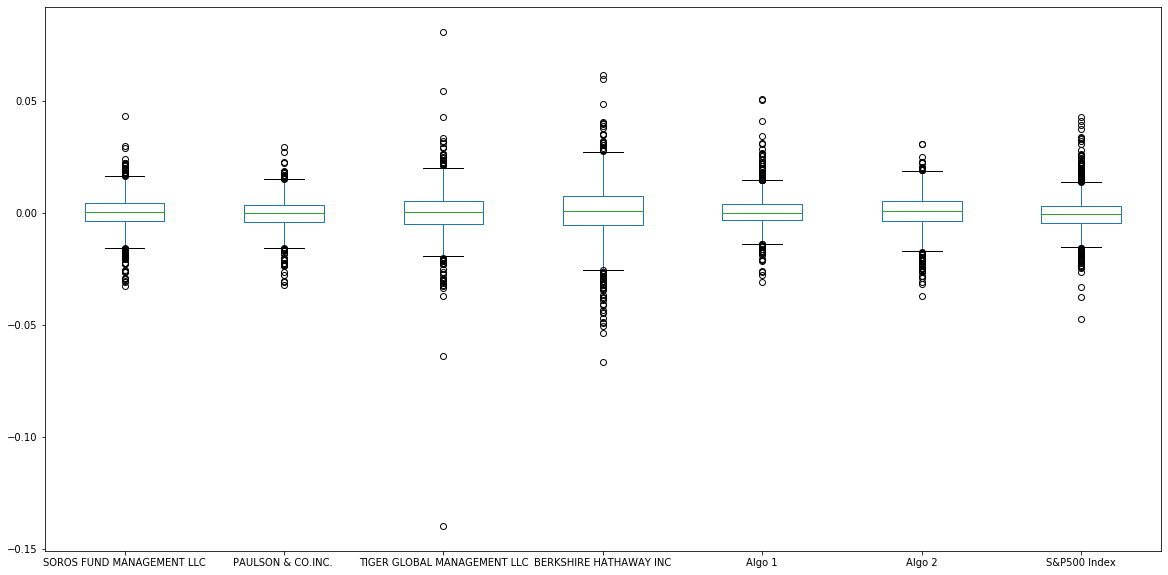

In [19]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_data.plot.box(figsize=(20,10))

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = combined_data.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500 Index                   0.008587
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_std = combined_std.sort_values(ascending=False)
combined_std


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500 Index                   0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [22]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = combined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500 Index                   0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

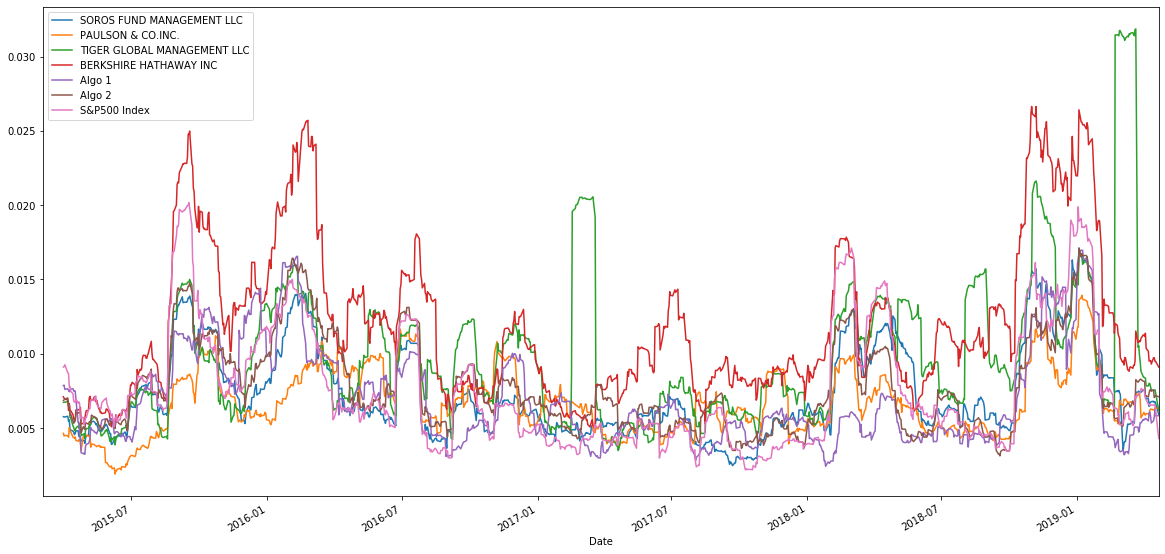

In [23]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_data.rolling(window=21).std().plot(figsize=(20,10))

In [24]:
# Correlation
# YOUR CODE HERE
data_correlation = combined_data.corr()
data_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Index
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500 Index,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
soros_cov = combined_data['SOROS FUND MANAGEMENT LLC'].cov(combined_data['S&P500 Index'])
soros_cov

3.889726983063765e-08

In [26]:
soros_var = combined_data['SOROS FUND MANAGEMENT LLC'].var()
soros_var

6.234979670065037e-05

In [27]:
soros_beta = soros_cov / soros_var
soros_beta

0.0006238556000012092

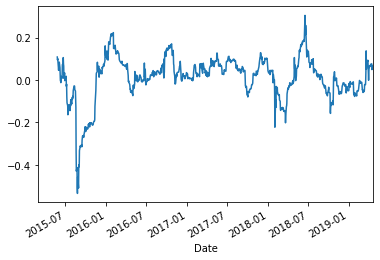

In [28]:
berkshire_rolling_cov = combined_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_data['S&P500 Index'])
berkshire_rolling_var = combined_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).var()
berkshire_rolling_beta = berkshire_rolling_cov / berkshire_rolling_var
berkshire_rolling_beta.plot()

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [29]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [30]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
data_sharp_ratio = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
data_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500 Index                  -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

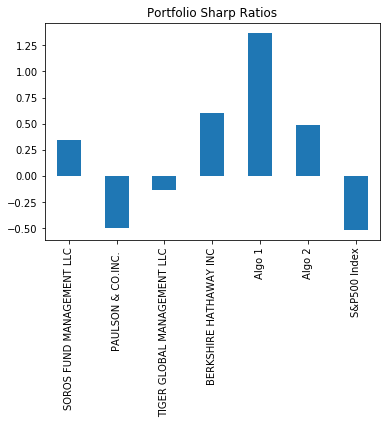

In [31]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
data_sharp_ratio.plot(kind="bar", title="Portfolio Sharp Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock
# YOUR CODE HERE
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, parse_dates=True)
goog_df.rename(columns={'NOCP':'GOOG_Close','Trade DATE':'Date'}, inplace=True)
goog_df.set_index(pd.to_datetime(goog_df['Date'], infer_datetime_format=True), inplace=True)
goog_df.drop(columns=['Symbol','Date'], inplace=True)
goog_df.sort_index(ascending=True, inplace=True)
goog_df.head()




,GOOG_Close
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [33]:
# # Read the second stock
# # YOUR CODE HERE
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, parse_dates=True)
aapl_df.rename(columns={'NOCP':'AAPL_Close','Trade DATE':'Date'}, inplace=True)
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
aapl_df.drop(columns=['Symbol','Date'], inplace=True)
aapl_df.sort_index(ascending=True, inplace=True)
aapl_df.head()

,AAPL_Close
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [34]:
# # Read the third stock
# # YOUR CODE HERE
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, parse_dates=True)
cost_df.rename(columns={'NOCP':'COST_Close','Trade DATE':'Date'}, inplace=True)
cost_df.set_index(pd.to_datetime(cost_df['Date'], infer_datetime_format=True), inplace=True)
cost_df.drop(columns=['Symbol','Date'], inplace=True)
cost_df.sort_index(ascending=True, inplace=True)
cost_df.head()

,COST_Close
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [35]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_close_df = pd.concat([goog_df,aapl_df,cost_df], axis="columns", join="inner")
combined_close_df.head()

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [36]:
# Reset the index
# YOUR CODE HERE

In [37]:
# Drop Nulls
# YOUR CODE HERE
combined_close_df.isnull().sum()

GOOG_Close    0
AAPL_Close    0
COST_Close    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_returns = combined_close_df.pct_change()
daily_returns.head()

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [39]:
daily_returns.isnull().sum()

GOOG_Close    1
AAPL_Close    1
COST_Close    1
dtype: int64

In [40]:
daily_returns.dropna(inplace=True)

In [41]:
daily_returns.head()

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


In [42]:
portfolio_weights = daily_returns.dot(weights)


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# YOUR CODE HERE
total_portfolios = pd.concat([combined_data,portfolio_weights], axis="columns",join="inner")
total_portfolios.columns


Index([  'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                      'S&P500 Index',                             0],
      dtype='object')

In [44]:
total_portfolios.rename(columns={0:"My Portfolio"},inplace=True)

In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
total_portfolios.replace(0, np.nan, inplace=True)


In [46]:
total_portfolios.dropna(inplace=True)
total_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Index,My Portfolio
Date,,,,,,,,
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,0.007600


In [53]:
total_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Index,My Portfolio
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [57]:
# Risk
# YOUR CODE HERE
total_portfolio_risk= total_portfolios.std()
total_portfolio_risk.sort_values(ascending=True,inplace=True)
total_portfolio_risk

PAULSON & CO.INC.              0.007445
Algo 1                         0.008500
Algo 2                         0.008838
SOROS FUND MANAGEMENT LLC      0.009348
S&P500 Index                   0.009671
My Portfolio                   0.013433
TIGER GLOBAL MANAGEMENT LLC    0.014829
BERKSHIRE HATHAWAY INC         0.015747
dtype: float64

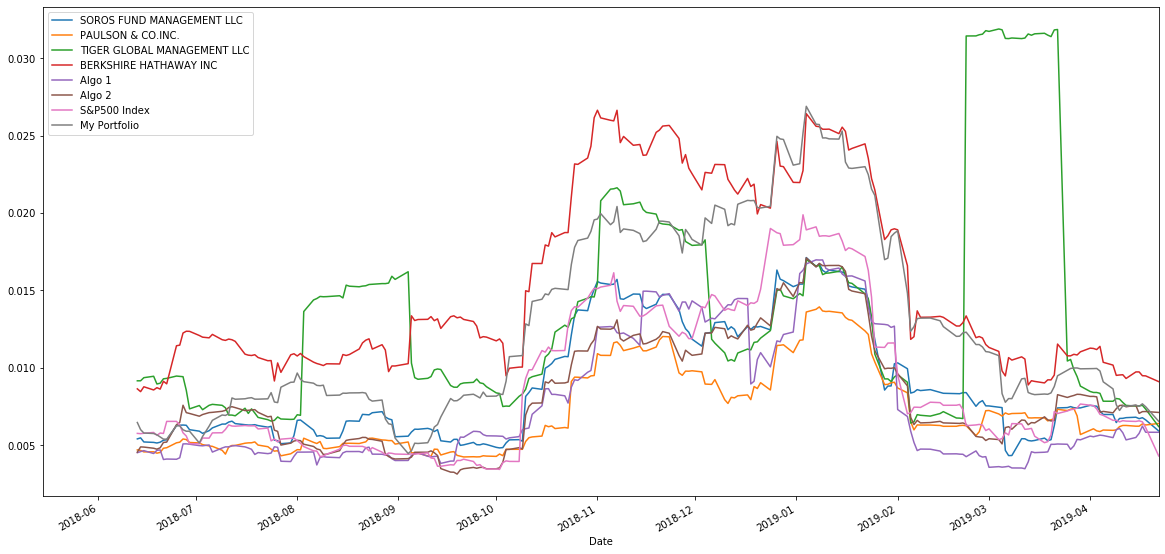

In [60]:
# Rolling
# YOUR CODE HERE
total_portfolios.rolling(window=21).std().plot(figsize=(20,10))

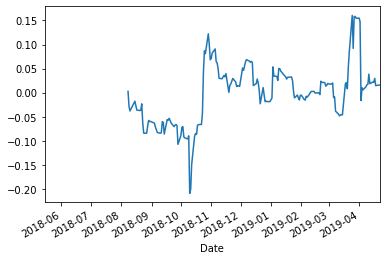

In [62]:
# Beta
# YOUR CODE HERE
my_portfolio_rolling_cov = total_portfolios['My Portfolio'].rolling(window=60).cov(total_portfolios['S&P500 Index'])
my_portfolio_rolling_var = total_portfolios['My Portfolio'].rolling(window=60).var()
my_portfolio_rolling_beta = my_portfolio_rolling_cov / my_portfolio_rolling_var
my_portfolio_rolling_beta.plot()

In [63]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
total_portfolio_sr = (total_portfolios.mean() * 252) / (total_portfolios.std() * np.sqrt(252))
total_portfolio_sr

SOROS FUND MANAGEMENT LLC      0.384082
PAULSON & CO.INC.              0.230017
TIGER GLOBAL MANAGEMENT LLC   -1.078120
BERKSHIRE HATHAWAY INC         0.104110
Algo 1                         2.108482
Algo 2                        -0.039658
S&P500 Index                  -0.489427
My Portfolio                   0.830346
dtype: float64

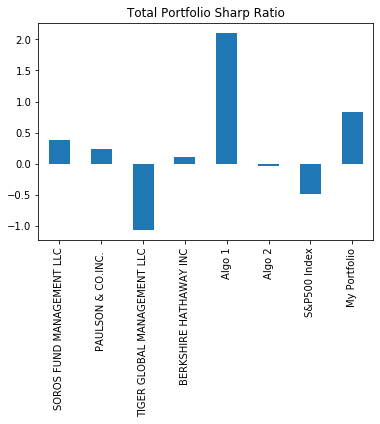

In [64]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
total_portfolio_sr.plot(kind='bar',title='Total Portfolio Sharp Ratio')

## Include correlation analysis to determine which stocks (if any) are correlated

In [65]:
# YOUR CODE HERE
total_portfolios_corr = total_portfolios.corr()
total_portfolios_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Index,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791801,0.477905,0.816199,0.337814,0.866974,-0.028266,0.734933
PAULSON & CO.INC.,0.791801,1.000000,0.484915,0.650389,0.361782,0.787830,-0.060035,0.645904
TIGER GLOBAL MANAGEMENT LLC,0.477905,0.484915,1.000000,0.324332,0.114570,0.410263,0.005626,0.392050
BERKSHIRE HATHAWAY INC,0.816199,0.650389,0.324332,1.000000,0.326989,0.785985,-0.038955,0.803109
Algo 1,0.337814,0.361782,0.114570,0.326989,1.000000,0.364578,-0.052551,0.260027
Algo 2,0.866974,0.787830,0.410263,0.785985,0.364578,1.000000,-0.043492,0.738420
S&P500 Index,-0.028266,-0.060035,0.005626,-0.038955,-0.052551,-0.043492,1.000000,0.008648
My Portfolio,0.734933,0.645904,0.392050,0.803109,0.260027,0.738420,0.008648,1.000000
